# Python Simulation (Step1) 

# Parameter 

In [1]:
import numpy as np 

In [2]:
# Given kinetic constants by Pellegrini et al.
mu5 = 1/3               
mu5star = 27/96
mu6 = 29/30 #9/16

#--------------------------#
# Kliso [MPa -1] 
Kliso59 = 5.46e0 *1e6
Kliso1014 = 5.48e1 *1e6
Kliso1522 = 9.46e2 *1e6
Kliso22 = 9.53e7 *1e6
#--------------------------#
# Kln [Mpa-1 ]
Kln14 = 5.46e-2 * 1e6
Kln59 = 5.47e0 * 1e6
Kln1014 = 5.48e1 * 1e6
Kln1522 = 9.05e2 * 1e6
Kln22 = 7.19e7 * 1e6
#--------------------------#
# Keq [Dimensionless]
Keq59 = 7.19e2
Keq1014 = 8.36e2
Keq1522 = 3.76e3
Keq22 = 5.73e3
#--------------------------#
# k0iso [kmol/(sec*kg_cat)]
k0iso59 = 1.14e23 / 3600
k0iso1014 = 2.60e24 / 3600
k0iso1522 = 9.47e27 / 3600
k0iso22 = 2.80e29 / 3600
#--------------------------#
# k0cr [kmol/(sec*kg_cat)]
k0cr59 = 4.48e22 / 3600             
k0cr1014 = 9.50e24 / 3600
k0cr1522 = 7.05e26 / 3600                   
k0cr22 = 7.90e27 / 3600
#--------------------------#
# Eiso [kJ/kmol]
Eiso59 = 1.94e5
Eiso1014 = 1.94e5
Eiso1522 = 1.94e5
Eiso22 = 2.06e5
#--------------------------#
# Ecr [kJ/kmol]
Ecr59 = 1.30e5
Ecr1014 = 1.66e5
Ecr1522 = 1.82e5
Ecr22 = 1.87e5
#--------------------------#
T0 =T= 657.47 #654.51 #375+273.15  # Temperature at inlet [K]
P0 = 5.00 #4.75 #6.96  # Pressure inlet [Mpa] 
#--------------------------#
# Physical Condition
length = 15 
diameter = 2.5   # Reactor diameter[m]
Area = np.pi * (diameter/2)**2. # Reactor cross section area [m^2]
R = 8.314  # kJ/(kmol*K)
#--------------------------#
# Total flows at inlet
Vin = 0.0431 #0.00292       # Actual volume flow [m3/s] 
#--------------------------#
mu_gas = 2.5140e-05 * 1e-6   # Dynamic viscosity [Mpa*s]
#--------------------------#
# Catalyst 
rhocat = 950  # kg/m3 reactor  
epsilon = 0.8 # Void fraction
dp = 0.005 # diameter of Catalyst particle   
rhogas = 8.6843 # gas density [kg/m3]
vs = Vin / Area # Superficial gas velocity [m/s]
G = vs*rhogas   # kg/(m^3*s)
Rep = G*dp/mu_gas # partical Raynolds number
f = 150 + 1.75 * Rep/(1-epsilon) # friction factor
#--------------------------#

In [3]:
V = length * Area
tou = V/Vin/3600
WHSV = 1/tou

print(f'trickle bed reactor volume is {V:1.3f} m^3.')
print(f'contact time is {tou:1.2f} hr.')
print(f'WHSV is {1/tou:1.2f} hr-1.')

WHSV_lb = 1 # hr-1
WHSV = 2    # hr-1
WHSV_up = 3 # hr-1

tou_lb = 1/WHSV_lb 
tou_up = 1/WHSV_up
tou = 1/WHSV
Vin_lb = V/3600/tou_lb
Vin_up = V/3600/tou_up
Vin = V/3600/tou
Vin_lb,Vin_up,Vin

trickle bed reactor volume is 73.631 m^3.
contact time is 0.47 hr.
WHSV is 2.11 hr-1.


(0.02045307717180855, 0.061359231515425654, 0.0409061543436171)

# Weight Fraction of Hydrocarbons and H2/Wax Ratio 

In [4]:
Wax = 6.475 # kg/sec 

H2_Wax = 1769.0330# 28.4962#89.5012# 0.5201 #0.105  

# weight fraction of wax 
WFC14 = 1e-5
WFC59 = 1e-5
WFC1014 = 1e-5
WFC1522 = 1e-5
WFC2356 = 1

# MW [Kg/Kmol]
MWH2 = 2.016 # Kg/Kmol 
MWC14 = 37.0825 # Kg/Kmol
MWC59 = 84 # Kg/Kmol 
MWC1014 = 150 # Kg/Kmol 
MWC1522 = 210 # Kg/Kmol 
MWC2356 = 350 # Kg/Kmol 

WC14 = Wax * WFC14 # kg/sec
WC59 = Wax * WFC59 # kg/sec
WC1014 = Wax * WFC1014 # kg/sec
WC1522 = Wax * WFC1522 # kg/sec
WC2356 = Wax * WFC2356 # kg/sec
WH2 = Wax* H2_Wax # kg/sec

MC14 = WC14 / MWC14 # kmol/sec
MC59 = WC59 / MWC59 # kmol/sec
MC1014 = WC1014 / MWC1014 # kmol/sec
MC1522 = WC1522 / MWC1522 # kmol/sec
MC2356 = WC2356 / MWC2356 # kmol/sec
MH2 = WH2 / MWH2 # kmol/sec

print(f'Mass flow rate of H2 is {WH2} kg/sec')
print(f'Mass flow rate of C9- is {WC14} kg/sec')
print(f'Mass flow rate of C9- is {WC59} kg/sec')
print(f'Mass flow rate of C1014 is {WC1014} kg/sec')
print(f'Mass flow rate of C1522 is {WC1522} kg/sec')
print(f'Mass flow rate of C2370 is {WC2356} kg/sec')
print()
print(f'Molar flow rate of H2 is {MH2:1.5f} kmol/sec.')
print(f'Molar flow rate of C9- is {MC14:1.5f} kmol/sec.')
print(f'Molar flow rate of C9- is {MC59:1.5f} kmol/sec.')
print(f'Molar flow rate of C1014 is {MC1014:1.5f} kmol/sec.')
print(f'Molar flow rate of C1522 is {MC1522:1.5f} kmol/sec.')
print(f'Molar flow rate of C2370 is {MC2356:1.5f} kmol/sec.')

Mass flow rate of H2 is 11454.488674999999 kg/sec
Mass flow rate of C9- is 6.475e-05 kg/sec
Mass flow rate of C9- is 6.475e-05 kg/sec
Mass flow rate of C1014 is 6.475e-05 kg/sec
Mass flow rate of C1522 is 6.475e-05 kg/sec
Mass flow rate of C2370 is 6.475 kg/sec

Molar flow rate of H2 is 5681.79002 kmol/sec.
Molar flow rate of C9- is 0.00000 kmol/sec.
Molar flow rate of C9- is 0.00000 kmol/sec.
Molar flow rate of C1014 is 0.00000 kmol/sec.
Molar flow rate of C1522 is 0.00000 kmol/sec.
Molar flow rate of C2370 is 0.01850 kmol/sec.


In [5]:
def k1(T): # isomerization of nC2370
    return k0iso22 * np.exp(-Eiso22/R/T)
def k2(T): # isomerization of nC1522
    return k0iso1522 * np.exp(-Eiso1522/R/T)
def k3(T): # isomerization of nC1014
    return k0iso1014 * np.exp(-Eiso1014/R/T)
def k4(T): # isomerization of nC59
    return k0iso59 * np.exp(-Eiso59/R/T)
#-----------------------------------------------#
def k5(T): # hydrocracking of iso C2370
    return k0cr22 * np.exp(-Ecr22/R/T)
def k6(T): # hydrocracking of iso C1522
    return k0cr1522 * np.exp(-Ecr1522/R/T)
def k7(T): # hydrocracking of iso C1014
    return k0cr1014 * np.exp(-Ecr1014/R/T)
def k8(T): # hydrocracking of iso C59
    return k0cr59 * np.exp(-Ecr59/R/T)
#-----------------------------------------------#

# ODE Function 

In [6]:
def dFdZ(F,Z): # ode function 
    
    Fh2,Fco,Fco2,Fh20,FC14,FC59,FC1014,FC1522,FC2370,FiC59,FiC1014,FiC1522,FiC2370,y = F
    P = y*P0
    Ft = Fh2+Fco+Fco2+Fh20+FC14+FC59+FC1014+FC1522+FC2370+FiC59+FiC1014+FiC1522+FiC2370
    
    Ph2 = Fh2 / Ft * P   # patial pressure of h2
    Pco = Fco / Ft * P    # patial pressure of co
    Pco2 = Fco2 / Ft * P  # patial pressure of co2
    Ph20 = Fh20 / Ft * P  # patial pressure of h20
    PC14 = FC14 / Ft * P  # patial pressure of C14
    PC59 = FC59 / Ft * P  # patial pressure of C59
    PC1014 = FC1014 / Ft * P # patial pressure of C1014
    PC1522 = FC1522 / Ft * P # patial pressure of C1522
    PC2370 = FC2370 / Ft * P # patial pressure of C2370
    PiC59 = FiC59 / Ft * P    # patial pressure of iC59
    PiC1014 = FiC1014 / Ft * P  # patial pressure of iC1014
    PiC1522 = FiC1522 / Ft * P  # patial pressure of iC1522
    PiC2370 = FiC2370 / Ft * P  # patial pressure of iC2370


    Adsorb = Ph2*(1+Kln22*PC2370+Kliso22*PiC2370+Kln1522*PC1522+Kliso1522*PiC1522
                  +Kln1014*PC1014+Kliso1014*PiC1014+Kln59*PC59+Kliso59*PiC59+Kln14*PC14)
    
    if Ph2 > 0: # reaction rates [kmol/(kgcat*sec)]
        #Isomerization    
        r1 = k1(T)*(PC2370-(PiC2370/Keq22))/Adsorb # kmol/(kgcat*sec)
        r2 = k2(T)*(PC1522-(PiC1522/Keq1522))/Adsorb # kmol/(kgcat*sec)
        r3 = k3(T)*(PC1014-(PiC1014/Keq1014))/Adsorb # kmol/(kgcat*sec)
        r4 = k4(T)*(PC59-(PiC59/Keq59))/Adsorb # kmol/(kgcat*sec)
        #Hydrocracking
        r5 = k5(T)*PiC2370/Adsorb # kmol/(kgcat*sec)
        r6 = k6(T)*(PiC1522)/Adsorb # kmol/(kgcat*sec)
        r7 = k7(T)*PiC1014/Adsorb # kmol/(kgcat*sec)
        r8 = k8(T)*PiC59/Adsorb # kmol/(kgcat*sec)
                   
    else:  # converge when all hydrogen is consumed
        r1 = 0                                      
        r2 = 0
        r3 = 0
        r4 = 0
        r5 = 0
        r6 = 0
        r7 = 0
        r8 = 0        

    # Rate expressions for each species 
    rn2370 = -r1 # kmol/(kgcat*sec)
    riso2370 = r1 + (-1 + 2*(1-mu5-mu5star))*r5 # kmol/(kgcat*sec)   
    rn1522 = -r2 # kmol/(kgcat*sec)
    riso1522 = r2 + 2*mu5*r5 -0.4*r6 # kmol/(kgcat*sec)        
    rn1014 = -r3 # kmol/(kgcat*sec)        
    riso1014 = r3 + 2*mu5star*r5 + 2*(1-mu6)*r6 - r7 # kmol/(kgcat*sec)   
    rn59 = -r4 # kmol/(kgcat*sec)
    riso59 = r4 + 2*mu6*r6 + 2*r7 - r8 # kmol/(kgcat*sec)
    rn14 = 2*r8 # kmol/(kgcat*sec)
    
    
    
    
    # (kmol/hr)/m --> dF/dZ: flow rate change over reactor length   
    dFdZn1 = rhocat * (1-epsilon) * rn14 * Area # nC14 [(kmol/sec)/m]
    dFdZn2 = rhocat * (1-epsilon) * rn59 * Area # nC59 [(kmol/sec)/m]
    dFdZn3 = rhocat * (1-epsilon) * rn1014 * Area  # nC1014 [(kmol/sec)/m]
    dFdZn4 = rhocat * (1-epsilon) * rn1522 * Area  # nC1522 [(kmol/sec)/m]
    dFdZn5 = rhocat * (1-epsilon) * rn2370 * Area  # nC2370 [(kmol/sec)/m]
    dFdZi1 = rhocat * (1-epsilon) * riso59 * Area   # iC59 [(kmol/sec)/m]
    dFdZi2 = rhocat * (1-epsilon) * riso1014 * Area  # iC1014 [(kmol/sec)/m]
    dFdZi3 = rhocat * (1-epsilon) * riso1522 * Area  # iC1522 [(kmol/sec)/m]
    dFdZi4 = rhocat * (1-epsilon) * riso2370 * Area  # iC2370 [(kmol/sec)/m]
    #dFdZH2 = rhocat * (1-epsilon) * rH2 * Area # H2 [(kmol/sec)/m]
    dFdZH2 = -(dFdZn1+dFdZn2+dFdZn3+dFdZn4+dFdZn5+dFdZi1+dFdZi2+dFdZi3+dFdZi4)
    dFdZCO = 0 # CO [(kmol/sec)/m]
    dFdZCO2 = 0 # CO2 [(kmol/sec)/m]
    dFdZH2O = 0 # H20 [(kmol/sec)/m]
                                                                              
    # 1/m  dy/dZ: nondemensionalized pressure change over reactor length
    # Pressure equation (Ergun's equation)            
    dy = -1/(P0*1e6)*f*G*mu_gas/(rhogas*dp**2)*(1-epsilon)**2/epsilon**3
    return [dFdZH2,dFdZCO, dFdZCO2, dFdZH2O, dFdZn1, dFdZn2, dFdZn3, dFdZn4, dFdZn5, dFdZi1, dFdZi2, dFdZi3, dFdZi4, dy]

# Solve 

In [7]:
from scipy.integrate import odeint

In [8]:

python_pts = 35 
lspan = np.linspace(0,length,python_pts)
#-----------------------------------------------#
# initial conditions for odeint 
b0 = [MH2,  0, 0, 0,  MC14,   MC59 ,MC1014, MC1522, MC2356,  0,  0,  0,  0, 1]

#-----------------------------------------------#
sol = odeint(dFdZ,b0,lspan)
#-----------------------------------------------#

# collect results of differential variables
Fh2 = sol[:, 0]
Fco = sol[:, 1]
Fco2 = sol[:, 2]
Fh20 = sol[:, 3]
FC14 = sol[:,4]
FC59 = sol[:,5]
FC1014 = sol[:,6]
FC1522 = sol[:, 7]
FC2370 = sol[:, 8]
FiC59 = sol[:,9]
FiC1014 = sol[:,10]
FiC1522 = sol[:,11]
FiC2370 = sol[:,12]
y = sol[:,13]

P = y*P0
Ftotal = FC14+FC59+FC1014+FC1522+FC2370+FiC59+FiC1014+FiC1522+FiC2370+Fh2+Fco+Fco2+Fh20 # total flow rate results

Ph2 = Fh2 / Ftotal * P   # patial pressure of h2
Pco = Fco / Ftotal * P    # patial pressure of co
Pco2 = Fco2 / Ftotal * P  # patial pressure of co2
Ph20 = Fh20 / Ftotal * P  # patial pressure of h20
PC14 = FC14 / Ftotal * P  # patial pressure of C14
PC59 = FC59 / Ftotal * P  # patial pressure of C59
PC1014 = FC1014 / Ftotal * P # patial pressure of C1014
PC1522 = FC1522 / Ftotal * P # patial pressure of C1522
PC2370 = FC2370 / Ftotal * P # patial pressure of C2370
PiC59 = FiC59 / Ftotal * P    # patial pressure of iC59
PiC1014 = FiC1014 / Ftotal * P  # patial pressure of iC1014
PiC1522 = FiC1522 / Ftotal * P  # patial pressure of iC1522
PiC2370 = FiC2370 / Ftotal * P  # patial pressure of iC2370

Adsorb = Ph2*(1+Kln22*PC2370+Kliso22*PiC2370+Kln1522*PC1522+Kliso1522*PiC1522
              +Kln1014*PC1014+Kliso1014*PiC1014+Kln59*PC59+Kliso59*PiC59+Kln14*PC14)

r1 = k0iso22 * np.exp(-Eiso22/R/T)*(PC2370-(PiC2370/Keq22))/Adsorb
r2 = k0iso1522 * np.exp(-Eiso1522/R/T)*(PC1522-(PiC1522/Keq1522))/Adsorb
r3 = k0iso1014 * np.exp(-Eiso1014/R/T)*(PC1014-(PiC1014/Keq1014))/Adsorb
r4 = k0iso59 * np.exp(-Eiso59/R/T)*(PC59-(PiC59/Keq59))/Adsorb        
r5 = k0cr22 * np.exp(-Ecr22/R/T)*PiC2370/Adsorb
r6 = k0cr1522 * np.exp(-Ecr1522/R/T)*(PiC1522)/Adsorb
r7 = k0cr1014 * np.exp(-Ecr1014/R/T)*PiC1014/Adsorb
r8 = k0cr59 * np.exp(-Ecr59/R/T)*PiC59/Adsorb


# Rate expressions for each species 
rn2370 = -r1 # kmol/(kgcat*hr)
riso2370 = r1 + (-1 + 2*(1-mu5-mu5star))*r5 # kmol/(kgcat*hr)   
rn1522 = -r2 # kmol/(kgcat*hr)
riso1522 = r2 + 2*mu5*r5 -0.4* r6 # kmol/(kgcat*hr)        
rn1014 = -r3 # kmol/(kgcat*hr)        
riso1014 = r3 + 2*mu5star*r5 + 2*(1-mu6)*r6 - r7 # kmol/(kgcat*hr)   
rn59 = -r4 # kmol/(kgcat*hr)
riso59 = r4 + 2*mu6*r6 + 2*r7 - r8 # kmol/(kgcat*hr)
rn14 = 2*r8 # kmol/(kgcat*hr)
    
dFdZn1 = rhocat * (1-epsilon) * rn14 * Area             
dFdZn2 = rhocat * (1-epsilon) * rn59 * Area              
dFdZn3 = rhocat * (1-epsilon) * rn1014 * Area           
dFdZn4 = rhocat * (1-epsilon) * rn1522 * Area              
dFdZn5 = rhocat * (1-epsilon) * rn2370 * Area              
dFdZi1 = rhocat * (1-epsilon) * riso59 * Area              
dFdZi2 = rhocat * (1-epsilon) * riso1014 * Area            
dFdZi3 = rhocat * (1-epsilon) * riso1522 * Area            
dFdZi4 = rhocat * (1-epsilon) * riso2370 * Area  

dFdZH2 = -(dFdZn1+dFdZn2+dFdZn3+dFdZn4+dFdZn5+dFdZi1+dFdZi2+dFdZi3+dFdZi4)

                                                     
                                                           
#  results of mole fraction of each components
Ftotal_hydrocarbons = FC14+FC59+FC1014+FC1522+FC2370+FiC59+FiC1014+FiC1522+FiC2370 # total flow rate results

X_inC14 = FC14/Ftotal_hydrocarbons
X_inC59 = FC59/Ftotal_hydrocarbons
X_inC1014 = FC1014/Ftotal_hydrocarbons
X_inC1522 = FC1522/Ftotal_hydrocarbons
X_inC2370 = FC2370/Ftotal_hydrocarbons
X_iniC59 = FiC59/Ftotal_hydrocarbons
X_iniC1014 = FiC1014/Ftotal_hydrocarbons
X_iniC1522 = FiC1522/Ftotal_hydrocarbons
X_iniC2370 = FiC2370/Ftotal_hydrocarbons
#-----------------------------------------------#
dspan = lspan / length * 100
#-----------------------------------------------#

In [9]:
sum_ = X_inC14+X_inC59+X_inC1014+X_inC1522+X_inC2370+X_iniC59+X_iniC1014+X_iniC1522+X_iniC2370

# Plotting 

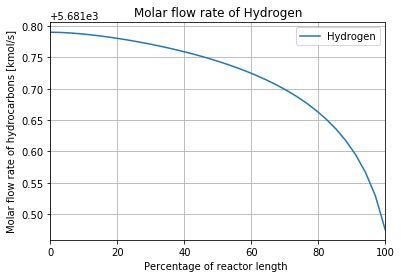

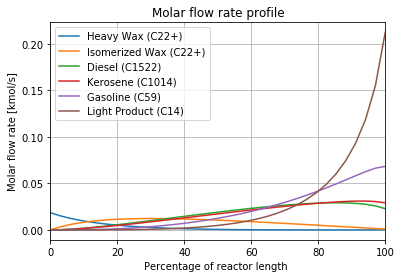

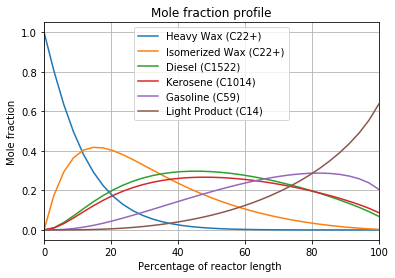

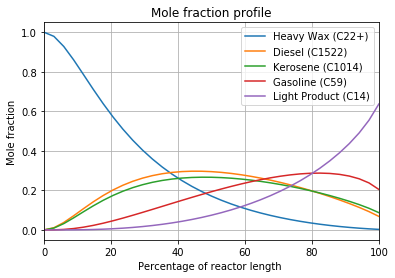

outlet molar flow rate of C22+ = 0.0009 kmol/s
outlet molar flow rate of C1522 = 0.0228 kmol/s
outlet molar flow rate of C1014 = 0.0291 kmol/s
outlet molar flow rate of C59 = 0.0683 kmol/s
outlet molar flow rate of C14 = 0.2126 kmol/s
outlet molar flow rate of H2 = 5681.4748 kmol/s

outlet molar fraction of C22+ = 0.0027 
outlet molar fraction of C1522 = 0.0683
outlet molar fraction of C1014 = 0.0872 
outlet molar fraction of C59 = 0.2047 
outlet molar fraction of C14 = 0.6370 
summation of outlet molar flow rate of hydrocarbons = 0.3338kmol/s


In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.plot(dspan,sol[:,0])
plt.legend(['Hydrogen'],loc='best')
plt.title('Molar flow rate of Hydrogen')
plt.ylabel('Molar flow rate of hydrocarbons [kmol/s]')
plt.xlabel('Percentage of reactor length ')
plt.xlim(0,dspan[-1])
plt.grid()
#plt.savefig('mole flowrate profile of h2 .png')
plt.show() 

%matplotlib inline
plt.plot(dspan,FC2370,label = 'Heavy Wax (C22+)')
plt.plot(dspan,FiC2370,label = 'Isomerized Wax (C22+)')
plt.plot(dspan,FiC1522 + FC1522,label = 'Diesel (C1522)')
plt.plot(dspan,FiC1014 + FC1014,label = 'Kerosene (C1014)')
plt.plot(dspan,FiC59+ FC59,label = 'Gasoline (C59)')
plt.plot(dspan,FC14,label = 'Light Product (C14)')
plt.title('Molar flow rate profile')
plt.ylabel('Molar flow rate [kmol/s]')
plt.xlabel('Percentage of reactor length ')
plt.xlim(0,dspan[-1])
plt.legend(loc = 'best')
plt.grid()
plt.show()

plt.plot(dspan,X_inC2370,label = 'Heavy Wax (C22+)')
plt.plot(dspan,X_iniC2370,label = 'Isomerized Wax (C22+)')
plt.plot(dspan,X_iniC1522 + X_inC1522,label = 'Diesel (C1522)')
plt.plot(dspan,X_iniC1014 + X_inC1014,label = 'Kerosene (C1014)')
plt.plot(dspan,X_iniC59+ X_inC59,label = 'Gasoline (C59)')
plt.plot(dspan,X_inC14,label = 'Light Product (C14)')
plt.title('Mole fraction profile')
plt.ylabel('Mole fraction')
plt.xlabel('Percentage of reactor length ')
plt.xlim(0,dspan[-1])
plt.legend(loc = 'best')
plt.grid()
plt.savefig('1008_pic3.png')
plt.show()

###
%matplotlib inline
plt.plot(dspan,X_inC2370+X_iniC2370,label = 'Heavy Wax (C22+)')
#plt.plot(dspan,X_iniC2370,label = 'Branched Wax (C22+)')
plt.plot(dspan,X_iniC1522+X_inC1522,label = 'Diesel (C1522)')
plt.plot(dspan,X_iniC1014+X_inC1014,label = 'Kerosene (C1014)')
plt.plot(dspan,X_iniC59+X_inC59,label = 'Gasoline (C59)')
plt.plot(dspan,X_inC14,label = 'Light Product (C14)')
plt.title('Mole fraction profile')
plt.ylabel('Mole fraction')
plt.xlabel('Percentage of reactor length ')
plt.xlim(0,dspan[-1])
plt.legend(loc = 'best')
plt.grid()
plt.savefig('1008_pic3.png')
plt.show()
###

print(f'outlet molar flow rate of C22+ = {FC2370[-1]+FiC2370[-1]:1.4f} kmol/s')
print(f'outlet molar flow rate of C1522 = {FC1522[-1]+FiC1522[-1]:1.4f} kmol/s')
print(f'outlet molar flow rate of C1014 = {FC1014[-1]+FiC1014[-1]:1.4f} kmol/s')
print(f'outlet molar flow rate of C59 = {FC59[-1]+FiC59[-1]:1.4f} kmol/s')
print(f'outlet molar flow rate of C14 = {FC14[-1]:1.4f} kmol/s')
print(f'outlet molar flow rate of H2 = {Fh2[-1]:1.4f} kmol/s')
print()
print(f'outlet molar fraction of C22+ = {X_inC2370[-1]+X_iniC2370[-1]:1.4f} ')
print(f'outlet molar fraction of C1522 = {X_inC1522[-1]+X_iniC1522[-1]:1.4f}')
print(f'outlet molar fraction of C1014 = {X_inC1014[-1]+X_iniC1014[-1]:1.4f} ')
print(f'outlet molar fraction of C59 = {X_inC59[-1]+X_iniC59[-1]:1.4f} ')
print(f'outlet molar fraction of C14 = {X_inC14[-1]:1.4f} ')
print(f'summation of outlet molar flow rate of hydrocarbons = {Ftotal_hydrocarbons[-1]:1.4f}kmol/s')

In [11]:
0.00832911900940597+ 0.028883853515217512+0.03875622078597054+0.02229807739064939+0.018037831717738997

0.1163051024189824

# Mass balance

In [12]:
#                 H2   C14   C59  C1014  C1522  C22+
In = np.array([Fh2[0],1e-5,1e-5,1e-5,1e-5,0.01850]) #kmol/s
Out = np.array([Fh2[-1],FC14[-1],FC59[-1]+FiC59[-1], FC1014[-1]+FiC1014[-1],FC1522[-1]+FiC1522[-1],FC2370[-1]+FiC2370[-1]]) #kmol/s

MWH2 = 2.016 # Kg/Kmol 
MWC14 = 37.0825 # Kg/Kmol
MWC59 = 84 # Kg/Kmol 
MWC1014 = 150 # Kg/Kmol 
MWC1522 = 210 # Kg/Kmol 
MWC22 = 350 # Kg/Kmol 

MWC19 = 0.5*(MWC14+MWC59)

MW = np.array([MWH2,MWC14,MWC59,MWC1014,MWC1522,MWC22])

def TM(C):
    return C*12 + 1*(2*C+2)

ML = np.array([MWH2,TM(1),TM(5),TM(10),TM(15),TM(23)])
MM = np.array([MWH2,TM(2.5),TM(7),TM(12),TM(18.5),TM(39.5)])
MU = np.array([MWH2,TM(4),TM(9),TM(14),TM(22),TM(56)])

In [13]:
In@MU,Out@ML
print(f'Total [kg/s] at the inlet = {In@MU:1.2f} kg/s.')
print(f'Total [kg/s] at the outlet = {Out@ML:1.2f} kg/s.')

Total [kg/s] at the inlet = 11469.04 kg/s.
Total [kg/s] at the outlet = 11471.44 kg/s.


In [14]:
In@MW,Out@MW

(11460.968485825, 11476.95254753424)

# Varying Free Variables

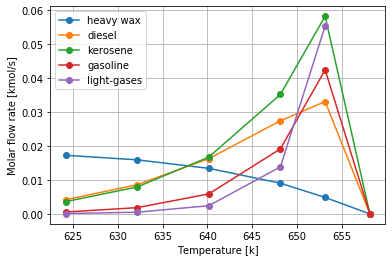

In [15]:
Vary_T = np.array([624.15,632.15,640.15,648.15,653.15,658.15])
Vary_T_ = np.array([624.15,632.15,640.15,648.15,653.15])

HW22_T = np.array([0.017284367,0.015933897,0.013432011,0.00905859,0.004851294,-1.88E-51])
HW1522_T = np.array([0.00417117,0.008607403,0.016290292,0.027442014,0.033107994,2.91E-43])
HW1014_T = np.array([0.003614664,0.007937227,0.016743674,0.035202358,0.058251989,-1.10E-18])
HW59_T = np.array([0.000561469,0.001848474,0.005893113,0.019163509,0.042465118,-2.06E-12])
HW14_T = np.array([0.000106193,0.000500367,0.002416623,0.013859087,0.055396173])

plt.plot(Vary_T,HW22_T,'-o',label='heavy wax')
plt.plot(Vary_T,HW1522_T,'-o',label='diesel')
plt.plot(Vary_T,HW1014_T,'-o',label='kerosene')
plt.plot(Vary_T,HW59_T,'-o',label='gasoline')
plt.plot(Vary_T_,HW14_T,'-o',label='light-gases')
plt.xlabel('Temperature [k]')
plt.ylabel('Molar flow rate [kmol/s]')
plt.grid()
plt.legend()

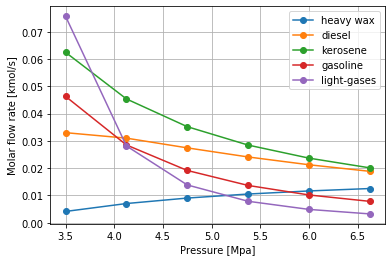

In [16]:
Vary_P = np.array([3.5,4.125,4.75,5.375,6,6.625])
HW22_P = np.array([0.00415364,0.007051278,0.00905859,0.010534015,0.011661725,0.012548813])
HW1522_P = np.array([0.033013384,0.031004984,0.027442014,0.024110885,0.021252883,0.018845545])
HW1014_P = np.array([0.062454778,0.045375001,0.035202358,0.02846353,0.023679133,0.0201161])
HW59_P = np.array([0.046309126,0.028514886,0.019163509,0.013674099,0.010188337,0.007844254])
HW14_P = np.array([0.075666633,0.028147503,0.013859087,0.007873985,0.004898277,0.003247454])

plt.plot(Vary_P,HW22_P,'-o',label='heavy wax')
plt.plot(Vary_P,HW1522_P,'-o',label='diesel')
plt.plot(Vary_P,HW1014_P,'-o',label='kerosene')
plt.plot(Vary_P,HW59_P,'-o',label='gasoline')
plt.plot(Vary_P,HW14_P,'-o',label='light-gases')
plt.xlabel('Pressure [Mpa]')
plt.ylabel('Molar flow rate [kmol/s]')
plt.grid()
plt.legend()

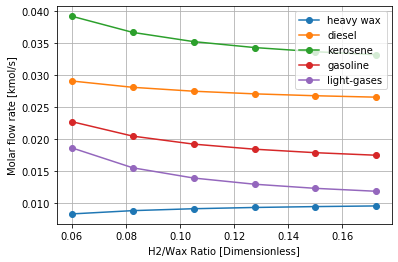

In [17]:
Vary_Ratio = np.array([0.06,0.0825,0.105,0.1275,0.15,0.1725])
HW22_Ratio = np.array([0.008245815,0.008758895,0.00905859,0.009254481,0.009392346,0.009494569])
HW1522_Ratio = np.array([0.029038691,0.028052564,0.027442014,0.027029985,0.026734094,0.026511624])
HW1014_Ratio = np.array([0.039172203,0.036643701,0.035202358,0.034274001,0.033627032,0.033150689])
HW59_Ratio = np.array([0.022674901,0.020416301,0.019163509,0.018370535,0.017824545,0.017426095])
HW14_Ratio = np.array([0.018577377,0.015459186,0.013859087,0.012892597,0.012247605,0.011787342])

plt.plot(Vary_Ratio,HW22_Ratio,'-o',label='heavy wax')
plt.plot(Vary_Ratio,HW1522_Ratio,'-o',label='diesel')
plt.plot(Vary_Ratio,HW1014_Ratio,'-o',label='kerosene')
plt.plot(Vary_Ratio,HW59_Ratio,'-o',label='gasoline')
plt.plot(Vary_Ratio,HW14_Ratio,'-o',label='light-gases')
plt.xlabel('H2/Wax Ratio [Dimensionless]')
plt.ylabel('Molar flow rate [kmol/s]')
plt.grid()
plt.legend()

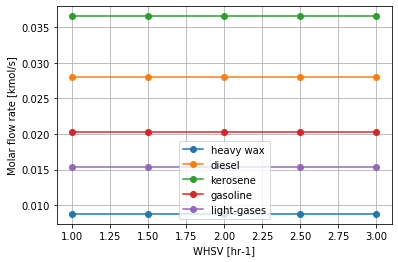

In [18]:
Vary_WHSV = np.array([1.0,1.5,2.0,2.5,3.0])
HW22_WHSV = np.array([0.008776308,0.008776308,0.008776307,0.008776306,0.008776304])
HW1522_WHSV = np.array([0.028017757,0.028017759,0.02801776,0.028017762,0.028017765])
HW1014_WHSV = np.array([0.036559252,0.036559255,0.036559259,0.036559264,0.036559271])
HW59_WHSV = np.array([0.020342191,0.020342194,0.020342197,0.020342202,0.020342207])
HW14_WHSV = np.array([0.015362051,0.015362054,0.015362059,0.015362064,0.015362071])

plt.plot(Vary_WHSV,HW22_WHSV,'-o',label='heavy wax')
plt.plot(Vary_WHSV,HW1522_WHSV,'-o',label='diesel')
plt.plot(Vary_WHSV,HW1014_WHSV,'-o',label='kerosene')
plt.plot(Vary_WHSV,HW59_WHSV,'-o',label='gasoline')
plt.plot(Vary_WHSV,HW14_WHSV,'-o',label='light-gases')
plt.xlabel('WHSV [hr-1]')
plt.ylabel('Molar flow rate [kmol/s]')
plt.grid()
plt.legend()